In [ ]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import tensorflow as tf
tf.test.gpu_device_name()

Mounted at /content/drive


'/device:GPU:0'

In [ ]:
#import packages

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline
import re
import sys
import warnings
import pandas as pd
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import joblib

In [ ]:
#needed for DNN 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from keras.regularizers import l2,l1
from keras.layers import Dropout
from keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from sklearn import preprocessing
from keras import layers
from tensorflow.keras.layers import LSTM,GRU,Bidirectional
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/dataset/bangla_comments_tokenized.csv', encoding='utf-8')
df.head()


,label,text,clean_text,tokenized_clean_text,tokenized_stem_text,token_length
0,Political,ছালা পাকিস্তানী বাশ দিয়া দাও ভর দিয়া হাটবো অভা...,ছালা পাকিস্তানীদের বাশ দিয়া দাও ভর দিয়া হাটবো ...,"['ছালা', 'পাকিস্তানীদের', 'বাশ', 'দিয়া', 'দাও'...","['ছালা', 'পাকিস্তানী', 'বাশ', 'দিয়া', 'দাও', '...",13
1,religious,ফ্যামিলিটা নাস্তিক থক আশা কর যায় না ফাউল,ফ্যামিলিটাই নাস্তিক থকে আশা করা যায় না ফাউল,"['ফ্যামিলিটাই', 'নাস্তিক', 'থকে', 'আশা', 'করা'...","['ফ্যামিলিটা', 'নাস্তিক', 'থক', 'আশা', 'কর', '...",8
2,sexual,তুই মাগি মাফ তুই আখিরাত বিশ্বাস করস না তুই বাপ...,তুই মাগি মাফ তুই আখিরাত বিশ্বাস করস না তুই বাপ...,"['তুই', 'মাগি', 'মাফ', 'তুই', 'আখিরাত', 'বিশ্ব...","['তুই', 'মাগি', 'মাফ', 'তুই', 'আখিরাত', 'বিশ্ব...",19
3,religious,সাফা কবির কঠিনফ্ ছিল তো চরমঘৃনা করি তুই নাস্তি...,সাফা কবির কঠিনফ্ ছিলাম তো চরমঘৃনা করি তুই নাস্...,"['সাফা', 'কবির', 'কঠিনফ্', 'ছিলাম', 'তো', 'চরম...","['সাফা', 'কবির', 'কঠিনফ্', 'ছিল', 'তো', 'চরমঘৃ...",14
4,not bully,সুপ সুপ হিরো,সুপার সুপার হিরো,"['সুপার', 'সুপার', 'হিরো']","['সুপ', 'সুপ', 'হিরো']",3


In [ ]:
df.label.value_counts()

Political    11000
sexual       11000
not bully    11000
religious     9036
Name: label, dtype: int64

In [ ]:
df['label'] = df['label'].replace({'not bully':'acceptable'})

In [ ]:
# label encoding for output

sample_data = [2000,5000,10000,20000,30000,40000]

def label_encoding(category,bool):
  le = preprocessing.LabelEncoder()
  le.fit(category)
  encoded_labels = le.transform(category)
  labels = np.array(encoded_labels) # Converting into numpy array
  class_names =le.classes_ ## Define the class names again
  if bool == True:
    print("\n\t\t\t Label Encoding ","\nClass Names:-->",le.classes_)
    for i in sample_data:
      print(category[i],' ', encoded_labels[i],'\n')
    return labels

labels = label_encoding(df.label,True)


			 Label Encoding  
Class Names:--> ['Political' 'acceptable' 'religious' 'sexual']
acceptable   1 

acceptable   1 

religious   2 

Political   0 

acceptable   1 

religious   2 



In [ ]:
#split the data in train, validation, test

def dataset_split(headlines,category):

    X,X_test,y,y_test = train_test_split(headlines,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(headlines),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))
  
    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [ ]:
df.clean_text=df.clean_text.astype(str)

X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(df.clean_text,labels)


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42036 
	Training		 34048 
	Test			 4204 
	Validation		 3784


In [ ]:
#define perameters for GRU and padding and tokenization
vocab_size =50000
embedding_dim = 64
max_length = 60
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
# Train Data Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train.values)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train.values)
train_padded = pad_sequences(train_sequences,padding=padding_type, maxlen=max_length)

In [ ]:
#Tokenizer Info
(word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
#insightful info about tokens
def tokenizer_info(mylist,bool):
  ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
  for w,c in ordered[:10]:
    print(w,"\t",c)

#Print all the information
print("Words --> Counts:")
tokenizer_info(word_counts,bool =True )
print("\nWords --> Documents:")
tokenizer_info(word_docs,bool =True )
print("\nWords --> Index:")
tokenizer_info(word_index,bool =True )    
print("\nTotal Documents -->",document_count)
print(f"Found {len(word_index)} unique tokens")

Words --> Counts:
না 	 12519
নাস্তিক 	 4388
যে 	 3829
বিশ্বাস 	 3250
কথা 	 3187
আল্লাহ 	 3140
ও 	 3005
তুই 	 2846
একটা 	 2266
সাফা 	 1857

Words --> Documents:
না 	 8256
নাস্তিক 	 3763
যে 	 3081
কথা 	 2539
ও 	 2385
আল্লাহ 	 2267
একটা 	 2044
বিশ্বাস 	 2039
তুই 	 1913
করা 	 1562

Words --> Index:
connection 	 52572
সবচেয়ের 	 52571
short 	 52570
বেহাত 	 52569
মঙ্গলশূভযাএা 	 52568
শুরতে 	 52567
এমহামারী 	 52566
কসাইতো 	 52565
নির্ঘাত 	 52564
জন্মালে 	 52563

Total Documents --> 34048
Found 52572 unique tokens


In [ ]:
def padded_headlines(original,encoded,padded):
  print("\n\t\t\t Encoded Sequences ","\n")  
  print(original,"\n",encoded) 
  print("\n\t\t\t Paded Sequences \n",original,"\n",padded)

padded_headlines(X_train[2],train_sequences[2],train_padded[2])


			 Encoded Sequences  

তুই মাগি মাফ তুই আখিরাত বিশ্বাস করস না তুই বাপের চুদায় জন্ম নিছস তুই বাপের মার চুদা দেখ নাই 
 [40, 2081, 1580, 1106, 3136, 24416, 577, 120, 1734, 2457, 392, 8, 681, 1477, 729, 310, 6986, 2219, 3585, 6361, 6987, 5861, 774, 2220, 16007, 2708, 5862, 1477, 2708, 5428, 5863, 610, 729, 12554, 6362, 1083, 971, 12555, 24417, 5429, 24418, 877, 3020, 1003, 815, 4190, 6988, 4190, 5430, 2900, 1735, 1408]

			 Paded Sequences 
 তুই মাগি মাফ তুই আখিরাত বিশ্বাস করস না তুই বাপের চুদায় জন্ম নিছস তুই বাপের মার চুদা দেখ নাই 
 [   40  2081  1580  1106  3136 24416   577   120  1734  2457   392     8
   681  1477   729   310  6986  2219  3585  6361  6987  5861   774  2220
 16007  2708  5862  1477  2708  5428  5863   610   729 12554  6362  1083
   971 12555 24417  5429 24418   877  3020  1003   815  4190  6988  4190
  5430  2900  1735  1408     0     0     0     0     0     0     0     0]


In [ ]:
# Validation Data Tokenization
validation_sequences = tokenizer.texts_to_sequences(X_valid.values)
validation_padded = pad_sequences(validation_sequences,padding=padding_type, maxlen=max_length)
#padded_headlines(X_valid[38000],validation_sequences[38000],validation_padded[38000])


In [ ]:
# Test Data Tokenization
test_sequences = tokenizer.texts_to_sequences(X_test.values)
test_padded = pad_sequences(test_sequences,padding=padding_type, maxlen=max_length)
#padded_headlines(X_test[35000],test_sequences[35000],test_padded[5000])


In [ ]:
train_label_seq = y_train
valid_label_seq = y_valid
testing_label_seq = y_test

In [ ]:
accuracy_threshold = 0.97
vocab_size = 50000
embedding_dim=128
max_length = 60
num_category = 4
opt=RMSprop(0.001)
path="/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/"

In [ ]:
keras.backend.clear_session()
#callback function for early stopping
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()

**Bidirectional GRU**

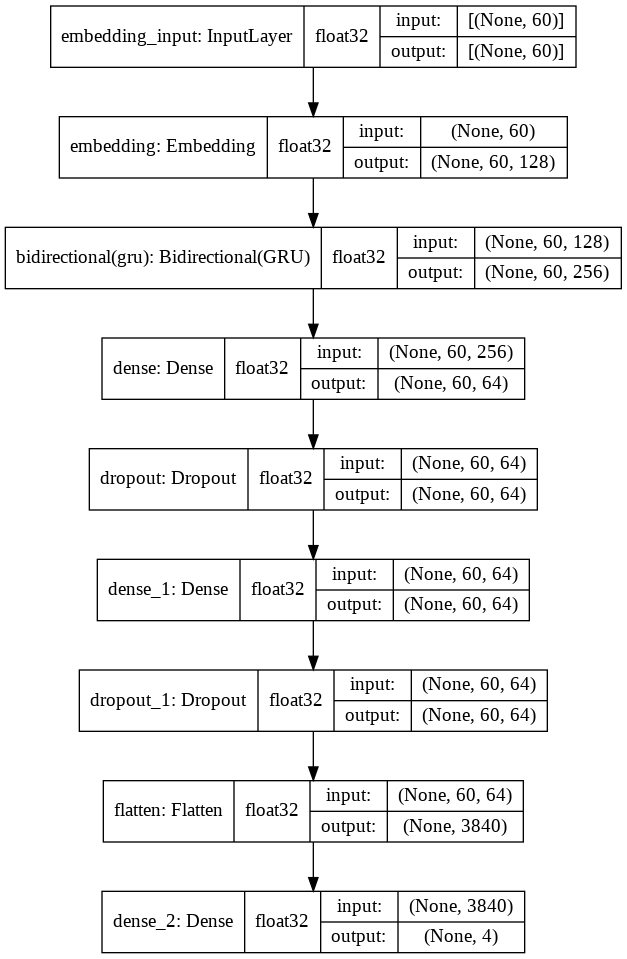

In [ ]:
# Saved the Best Model

filepath = path+"BidGruModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 


BGRU_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]),
    tf.keras.layers.Bidirectional(GRU(128,return_sequences=True,dropout=0.2)),
    #tf.keras.layers.Bidirectional(GRU(64, dropout = 0.2, recurrent_dropout = 0.2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])

tf.keras.utils.plot_model(BGRU_model, to_file= path+'plot model/'+'BGRUmodel.png',show_shapes=True,show_dtype=True)


In [ ]:
BGRU_model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
BGRU_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 128)           6400000   
_________________________________________________________________
bidirectional (Bidirectional (None, 60, 256)           198144    
_________________________________________________________________
dense (Dense)                (None, 60, 64)            16448     
_________________________________________________________________
dropout (Dropout)            (None, 60, 64)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 60, 64)            4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3840)              0

In [ ]:
num_epochs = 10
batch = 128

BGRU_model_history = BGRU_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)

Epoch 1/10
266/266 [==============================] - 12s 37ms/step - loss: 0.7254 - accuracy: 0.7091 - val_loss: 0.4726 - val_accuracy: 0.8288

Epoch 00001: val_accuracy improved from -inf to 0.82875, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/BidGruModel.h5
Epoch 2/10
266/266 [==============================] - 9s 35ms/step - loss: 0.3575 - accuracy: 0.8777 - val_loss: 0.4738 - val_accuracy: 0.8404

Epoch 00002: val_accuracy improved from 0.82875 to 0.84038, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/BidGruModel.h5
Epoch 3/10
266/266 [==============================] - 11s 40ms/step - loss: 0.2541 - accuracy: 0.9163 - val_loss: 0.4472 - val_accuracy: 0.8428

Epoch 00003: val_accuracy improved from 0.84038 to 0.84276, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/BidGruModel.h5
Epoch 4/10
266/266 [===========================

In [ ]:
# Plot training results
def model_evaluate(history,directory,filename):
  H = history.history
  fig = plt.figure(figsize = (20, 7))
  plt.subplot(121)
  plt.plot(H['accuracy'], label = 'acc')
  plt.plot(H['val_accuracy'], label = 'val_acc')
  plt.grid()
  plt.legend()
  plt.subplot(122)
  plt.plot(H['loss'], label = 'loss')
  plt.plot(H['val_loss'], label = 'val_loss')
  plt.grid()
  plt.legend()
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")


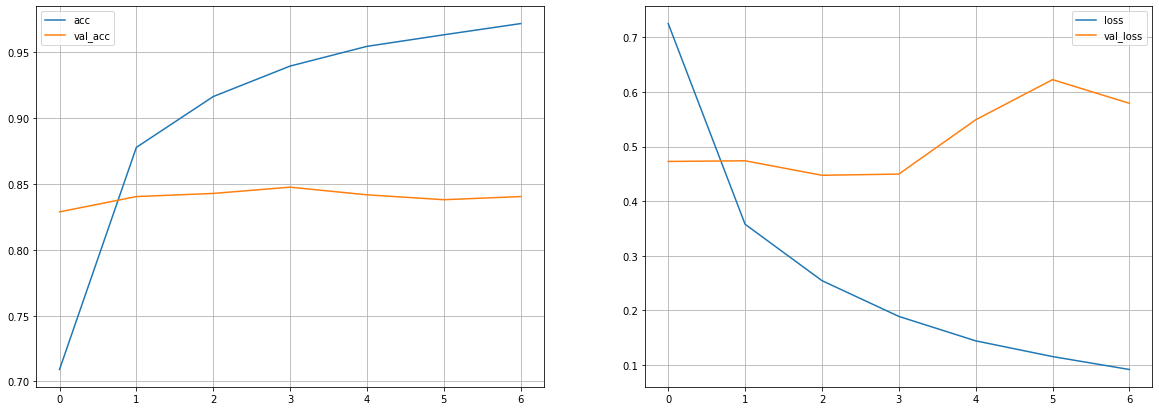

In [ ]:

model_evaluate(BGRU_model_history,"BiGru","Bi_Gru_evaluation")

In [ ]:
#confusion matrix
def conf_matrix(y_pred,classfier,directory,filename):

  cm = confusion_matrix(y_test, y_pred) 
# Transform to df for easier plotting
  
  cm_df = pd.DataFrame(cm,
                       index = ['Political', 'acceptable', 'religious', 'sexual'], 
                       columns = ['Political', 'acceptable', 'religious', 'sexual'])
  plt.figure(figsize=(8,6))
  sn.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
  plt.title('\n'+classfier+'Accuracy: {0:.2f}'.format(accuracy_score(testing_label_seq, y_pred)*100))
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.xticks(rotation = 45)
  plt.yticks(rotation = 45)
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")
  plt.show()
  plt.close()

In [ ]:
#Report generation

def report_generate(pred,classfier,directory,filename):
  report = pd.DataFrame(classification_report(y_true = testing_label_seq, y_pred = pred, output_dict=True)).transpose()
  report = report.rename(index={'0': 'Political','1':'acceptable','2':'religious','3':'sexual'})
  report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
  report=report.drop(["support"],axis=1)
  columns = ['precision','recall','f1-score']
  report.columns = columns
  plt = report.plot(kind='bar',figsize=(12,6))
  
  plot=plt.tick_params(rotation=40)
  plt.figure.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")
  
  return plot,report

In [ ]:
#make predictions

model = load_model(path+"BidGruModel.h5")
predictions = model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)


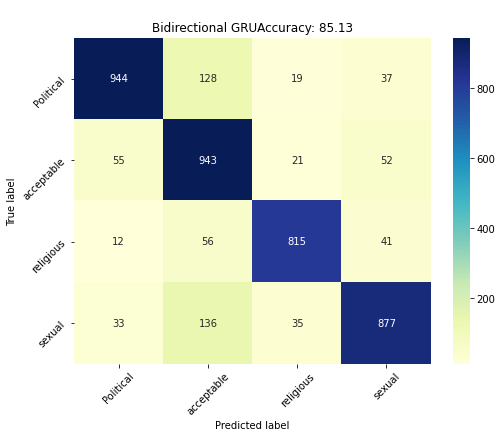

In [ ]:
conf_matrix(y_pred,"Bidirectional GRU","BiGru","Bi_Gru_confusion_matrix")

,precision,recall,f1-score
Political,90.42,83.69,86.92
acceptable,74.66,88.05,80.81
religious,91.57,88.20,89.86
sexual,87.09,81.13,84.00
accuracy,85.13,85.13,85.13
macro avg,85.94,85.27,85.40
weighted avg,85.80,85.13,85.26


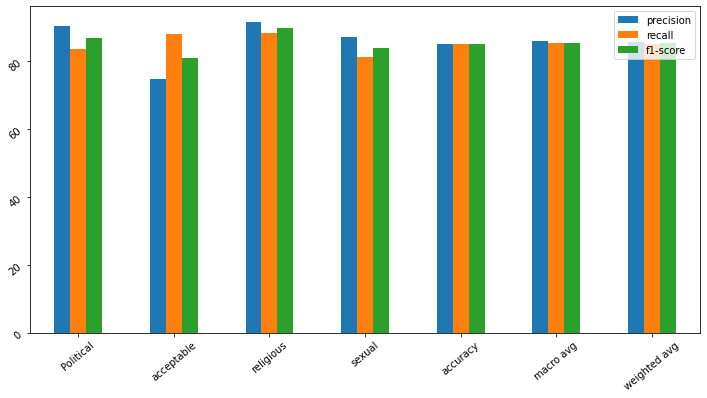

In [ ]:
GRUreport=report_generate(y_pred,"Bidirectional GRU","BiGru","Bi_Gru_report")
GRUreport[1]

**Bidirectional LSTM**

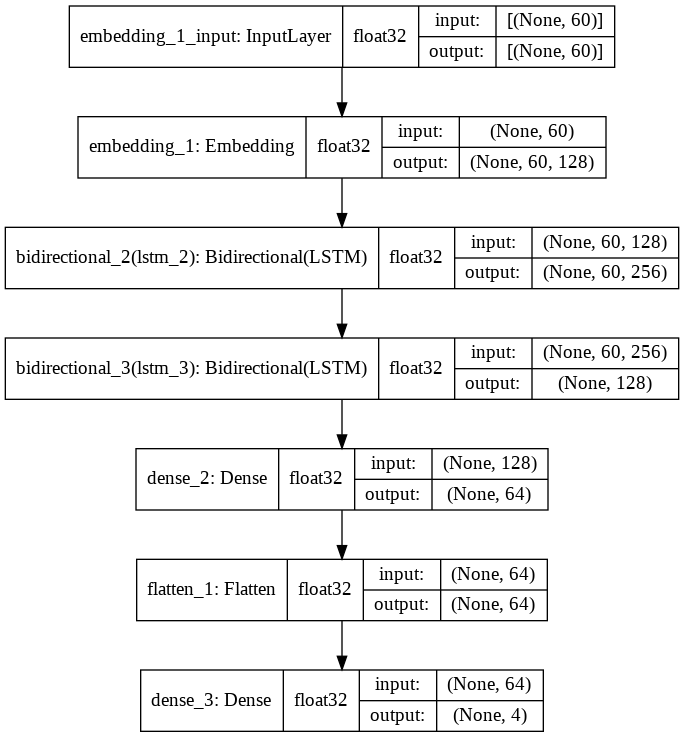

In [ ]:
embedding_dim=128
filepath = path+"RNN.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 

RNN_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]),
    tf.keras.layers.Bidirectional(LSTM(128,dropout = 0.2, recurrent_dropout = 0.2,return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])
tf.keras.utils.plot_model(RNN_model, to_file= path+'plot model/'+'RNNmodel.png', show_shapes=True, show_dtype=True,)


In [ ]:
RNN_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(RNN_model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 128)           6400000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60, 256)           263168    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 6,836,036
Trainable params: 6,836,036
Non-trainable params: 0
____________________________________________

In [ ]:
num_epochs = 10
batch = 128

RNN_history = RNN_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)



Epoch 1/10
266/266 [==============================] - 139s 499ms/step - loss: 0.7047 - accuracy: 0.7201 - val_loss: 0.4962 - val_accuracy: 0.8200

Epoch 00001: val_accuracy improved from -inf to 0.82003, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/RNN.h5
Epoch 2/10
266/266 [==============================] - 131s 493ms/step - loss: 0.3537 - accuracy: 0.8758 - val_loss: 0.4329 - val_accuracy: 0.8409

Epoch 00002: val_accuracy improved from 0.82003 to 0.84091, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/RNN.h5
Epoch 3/10
266/266 [==============================] - 134s 503ms/step - loss: 0.2506 - accuracy: 0.9156 - val_loss: 0.4330 - val_accuracy: 0.8459

Epoch 00003: val_accuracy improved from 0.84091 to 0.84593, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/RNN.h5
Epoch 4/10
266/266 [==============================] - 131s 494ms

In [ ]:
#make predictions

RNN_model = load_model(path+"RNN.h5")
RNN_predictions = RNN_model.predict(test_padded)
y_pred = np.argmax(RNN_predictions, axis=1)

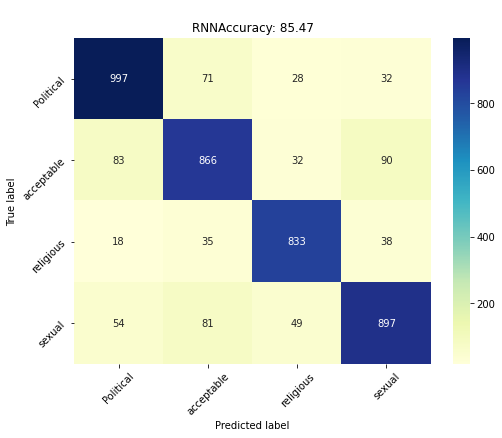

In [ ]:
conf_matrix(y_pred,"RNN","RNN","RNN_confusion_matrix")

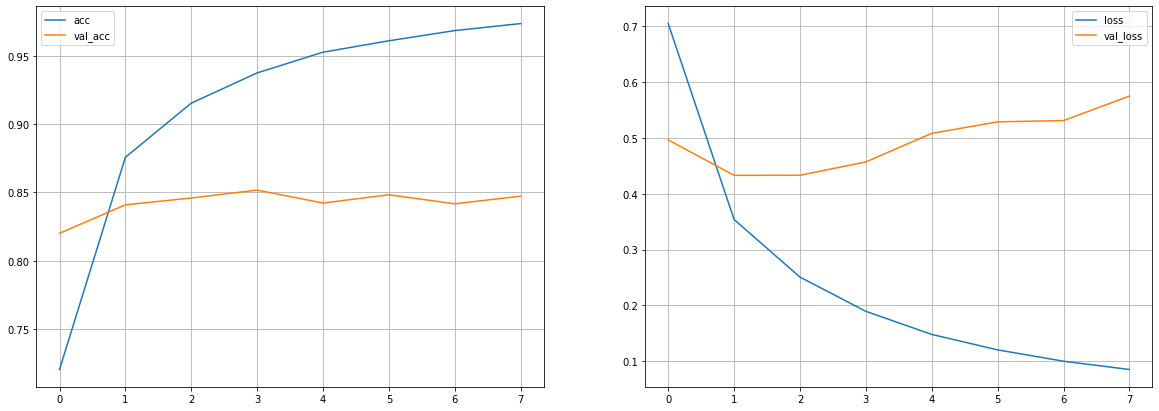

In [ ]:
# Plot training results
model_evaluate(RNN_history,"RNN","RNN_evaluation")


,precision,recall,f1-score
Political,86.55,88.39,87.46
acceptable,82.24,80.86,81.54
religious,88.43,90.15,89.28
sexual,84.86,82.98,83.91
accuracy,85.47,85.47,85.47
macro avg,85.52,85.59,85.55
weighted avg,85.43,85.47,85.44


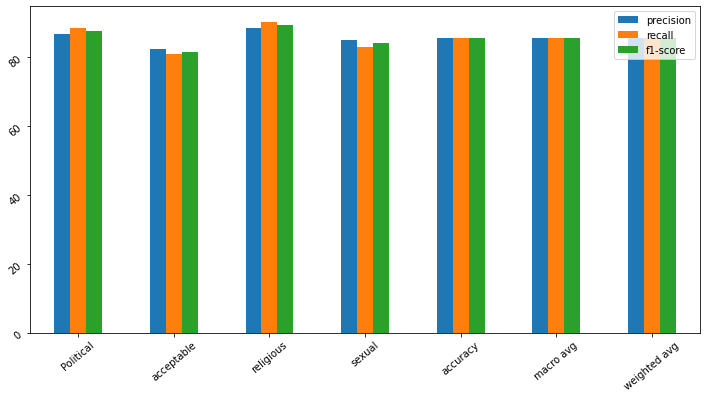

In [ ]:
RNNreport=report_generate(y_pred,"Bidirectional LSTM","RNN","Bi_LSTM_report")
RNNreport[1]

**LSTM**

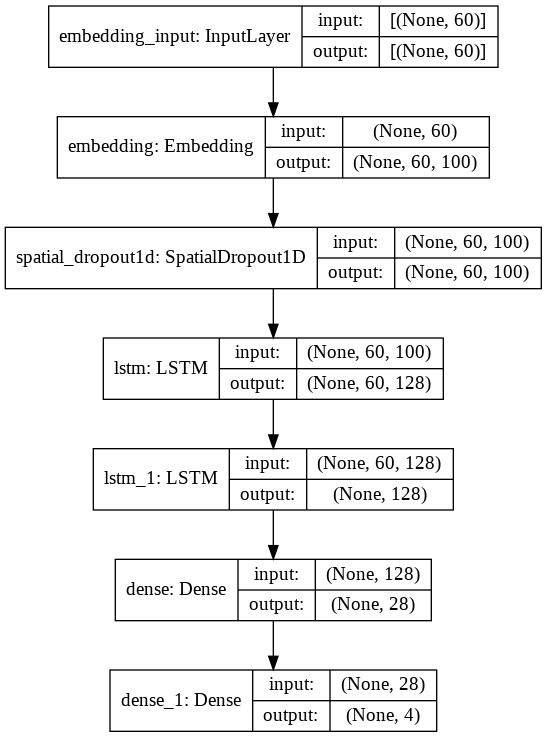

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.vis_utils import plot_model
filepath = path+"LSTM.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 

embedding_dim=100
LSTM_model = Sequential()
LSTM_model.add(Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]))
LSTM_model.add(SpatialDropout1D(0.2))
LSTM_model.add(LSTM(128,return_sequences=True, recurrent_dropout=0.5))
LSTM_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
#LSTM_model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1))
LSTM_model.add(Dense(28, activation="relu"))
LSTM_model.add(Dense(num_category, activation='softmax'))
plot_model(LSTM_model, to_file=path+'plot model/'+'LSTMmodel.png', show_shapes=True, show_layer_names=True)

In [ ]:
LSTM_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(LSTM_model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 100)           5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 60, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 60, 128)           117248    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 28)                3612      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 116       
Total params: 5,252,560
Trainable params: 5,252,560
Non-trainable params: 0
______________________________________________

In [ ]:
num_epochs = 20
batch = 128

LSTM_history = LSTM_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)


Epoch 1/20
266/266 [==============================] - 95s 269ms/step - loss: 1.3370 - accuracy: 0.3143 - val_loss: 1.1304 - val_accuracy: 0.4641

Epoch 00001: val_accuracy improved from -inf to 0.46406, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/LSTM.h5
Epoch 2/20
266/266 [==============================] - 70s 263ms/step - loss: 1.1001 - accuracy: 0.4572 - val_loss: 1.0481 - val_accuracy: 0.4511

Epoch 00002: val_accuracy did not improve from 0.46406
Epoch 3/20
266/266 [==============================] - 70s 263ms/step - loss: 1.0459 - accuracy: 0.4521 - val_loss: 1.0428 - val_accuracy: 0.4699

Epoch 00003: val_accuracy improved from 0.46406 to 0.46987, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/LSTM.h5
Epoch 4/20
266/266 [==============================] - 71s 267ms/step - loss: 1.0089 - accuracy: 0.4915 - val_loss: 0.9361 - val_accuracy: 0.5724

Epoch 00004: val_accuracy impr

In [ ]:
#make predictions

LSTM_model = load_model(path+"LSTM.h5")
predictions = LSTM_model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

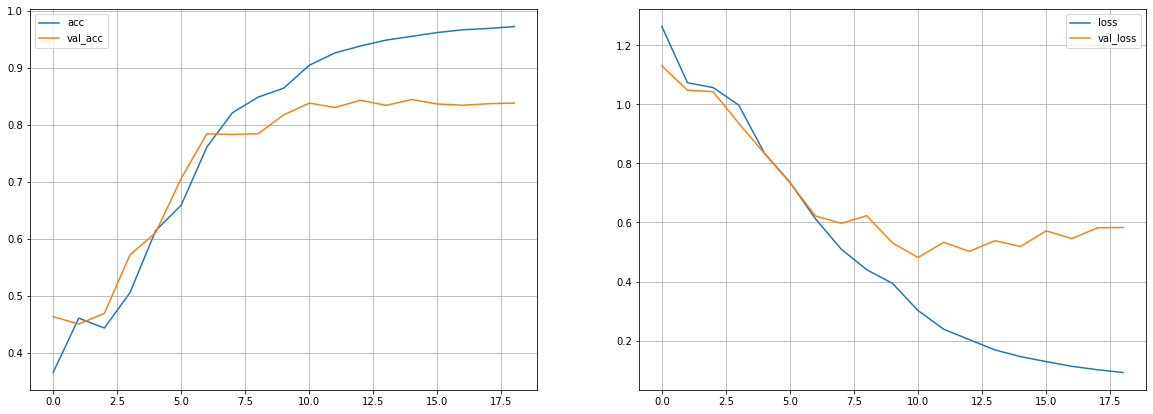

In [ ]:
# Plot training results
model_evaluate(LSTM_history,"LSTM","LSTM_evaluation")


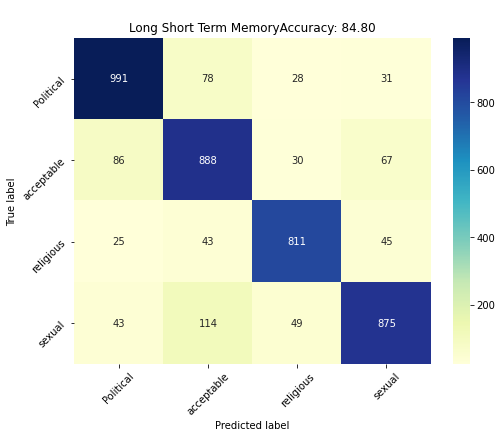

In [ ]:
conf_matrix(y_pred,"Long Short Term Memory","LSTM","LSTM_confusion_matrix")

,precision,recall,f1-score
Political,86.55,87.85,87.20
acceptable,79.07,82.91,80.95
religious,88.34,87.77,88.06
sexual,85.95,80.94,83.37
accuracy,84.80,84.80,84.80
macro avg,84.98,84.87,84.89
weighted avg,84.89,84.80,84.81


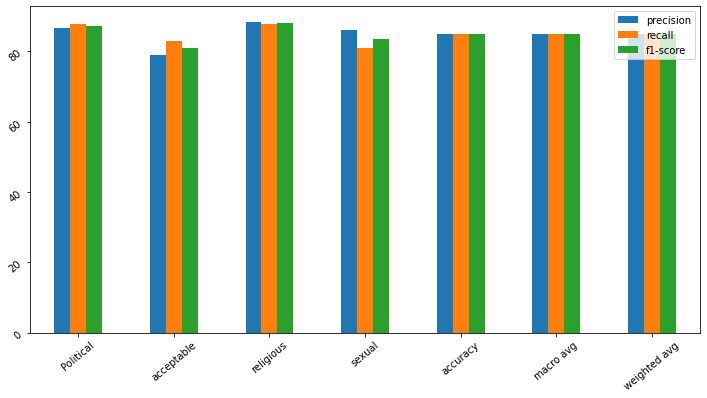

In [ ]:
LSTMreport=report_generate(y_pred,"Long Short Term Memory","LSTM","LSTM_report")
LSTMreport[1]

In [ ]:
#testing out
txt = ["এজন্য ভারত বাংলাদেশে এসে হোয়াইট ওয়াস হয়েগেছে মনে নেই"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = LSTM_model.predict(padded)

labels = ['Political', 'acceptable', 'religious', 'sexual']
print(pred, labels[np.argmax(pred)])

[[0.04410442 0.90922964 0.01214143 0.03452449]] acceptable


**C-LSTM**

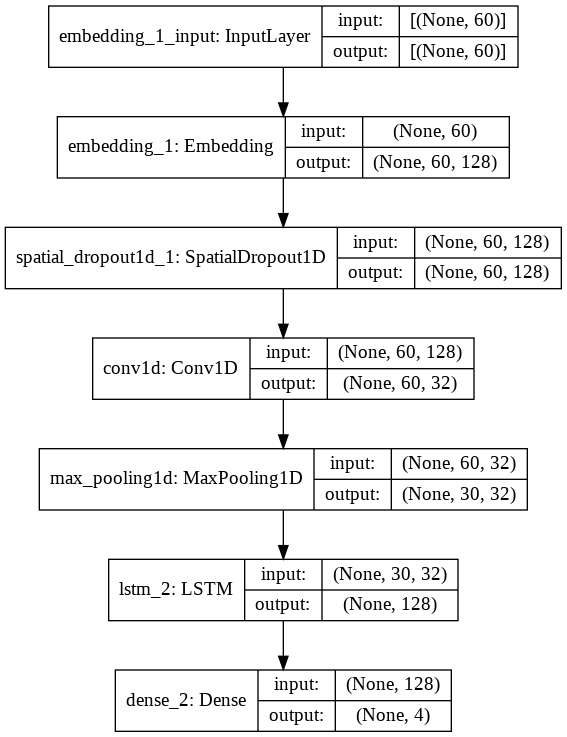

In [ ]:
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

filepath = path+"C-LSTM.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 
embedding_dim=128
# create the model
C_LSTM_model = Sequential()
C_LSTM_model.add(Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]))
C_LSTM_model.add(SpatialDropout1D(0.7))
C_LSTM_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
C_LSTM_model.add(MaxPooling1D(pool_size=2))
C_LSTM_model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5))
C_LSTM_model.add(Dense(4, activation='softmax'))
plot_model(C_LSTM_model, to_file=path+'plot model/'+'C_LSTMmodel.png', show_shapes=True, show_layer_names=True)



In [ ]:
C_LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(C_LSTM_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 128)           6400000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 60, 128)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 60, 32)            12320     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 30, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
Total params: 6,495,268
Trainable params: 6,495,268
Non-trainable params: 0
____________________________________________

In [ ]:
num_epochs = 20
batch = 128

C_LSTM_history = C_LSTM_model.fit(train_padded, train_label_seq,
                           epochs=num_epochs,
                           batch_size = batch,
                           validation_data=(validation_padded,valid_label_seq),
                           verbose=1,
                           callbacks = callback_list)


Epoch 1/20
266/266 [==============================] - 38s 123ms/step - loss: 1.2705 - accuracy: 0.3605 - val_loss: 0.9491 - val_accuracy: 0.5806

Epoch 00001: val_accuracy improved from -inf to 0.58060, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/C-LSTM.h5
Epoch 2/20
266/266 [==============================] - 31s 116ms/step - loss: 0.7957 - accuracy: 0.6763 - val_loss: 0.6352 - val_accuracy: 0.7709

Epoch 00002: val_accuracy improved from 0.58060 to 0.77088, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/C-LSTM.h5
Epoch 3/20
266/266 [==============================] - 32s 120ms/step - loss: 0.5592 - accuracy: 0.8045 - val_loss: 0.5543 - val_accuracy: 0.8200

Epoch 00003: val_accuracy improved from 0.77088 to 0.82003, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/C-LSTM.h5
Epoch 4/20
266/266 [==============================] - 31s 

In [ ]:
#make predictions

C_LSTM_model = load_model(path+"C-LSTM.h5")
predictions = C_LSTM_model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

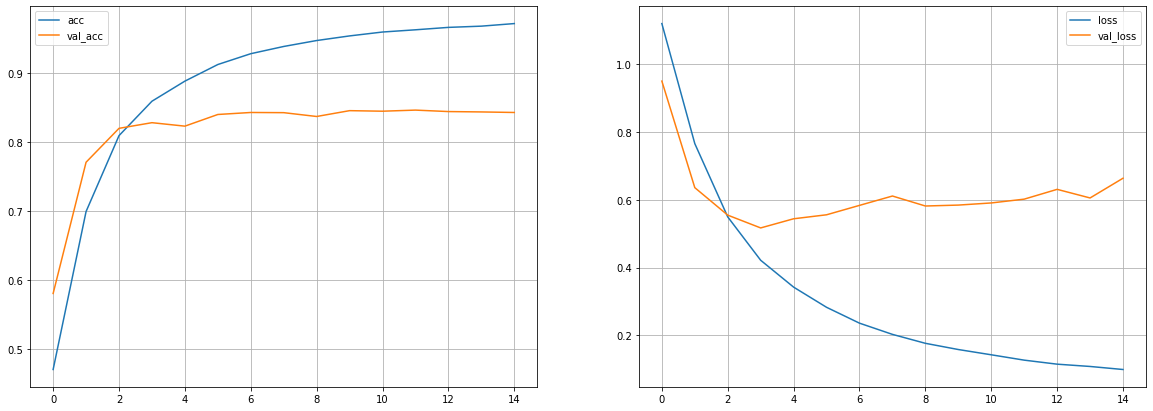

In [ ]:
# Plot training results
model_evaluate(C_LSTM_history,"C_LSTM","C_LSTM_evaluation")


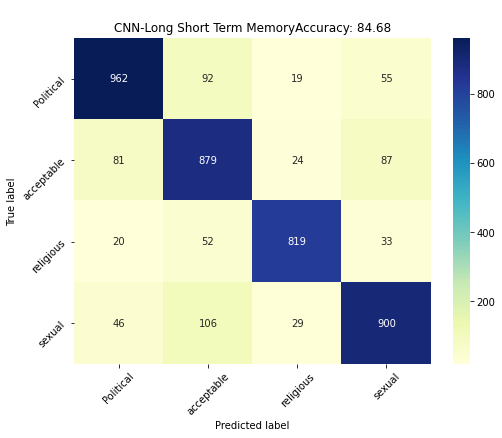

In [ ]:
conf_matrix(y_pred,"CNN-Long Short Term Memory","C_LSTM","C_LSTM_confusion_matrix")

,precision,recall,f1-score
Political,86.74,85.28,86.01
acceptable,77.86,82.07,79.91
religious,91.92,88.64,90.25
sexual,83.72,83.26,83.49
accuracy,84.68,84.68,84.68
macro avg,85.06,84.81,84.91
weighted avg,84.84,84.68,84.74


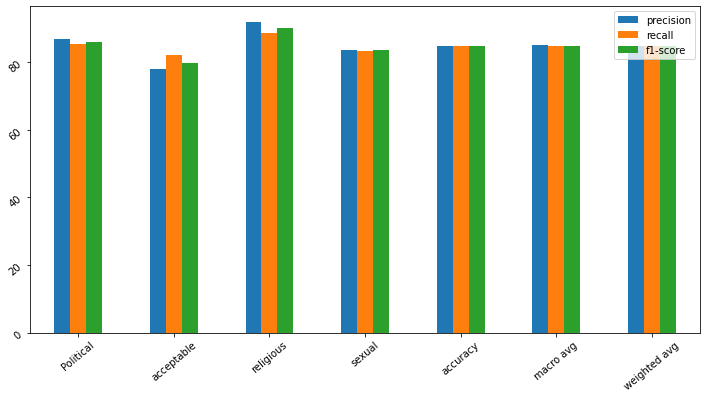

In [ ]:
C_LSTMreport=report_generate(y_pred,"CNN-Long Short Term Memory","C_LSTM","C_LSTM_report")
C_LSTMreport[1]

In [ ]:

MLA = {
     'Bidirectional GRU' : model,
     'Bidirectional LSTM' : RNN_model,
     'LSTM' : LSTM_model,
     'C_LSTM' : C_LSTM_model, 
}

In [ ]:
# Functions to compute True Positives, True Negatives, False Positives and False Negatives

def true_positive(y_true, y_pred):   
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1

In [ ]:
#Computation of macro-averaged precision

def macro_precision(y_true, y_pred):
    # find the number of classes
    num_classes = len(np.unique(y_true))
    # initialize precision to 0
    precision = 0
    categories = 4
    # loop over all classes
    for class_ in range (categories):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # compute true positive for current class
        tp = true_positive(temp_true, temp_pred)
        # compute false positive for current class
        fp = false_positive(temp_true, temp_pred)
        # compute precision for current class
        temp_precision = tp / (tp + fp + 1e-6)
        # keep adding precision for all classes
        precision += temp_precision
        
    # calculate and return average precision over all classes
    precision /= num_classes
    return precision

In [ ]:
def recall(y_true, y_pred, n_labels):
    total_f1 = 0.
    for i in range(n_labels):
        yt = y_true == i
        yp = y_pred == i

        tp = np.sum(yt & yp)

        tpfp = np.sum(yp)
        tpfn = np.sum(yt)
        if tpfp == 0:
            print('[WARNING] F-score is ill-defined and being set to 0.0 in labels with no predicted samples.')
            precision = 0.
        else:
            precision = tp / tpfp
        if tpfn == 0:
            print(f'[ERROR] label not found in y_true...')
            recall = 0.
        else:
            recall = tp / tpfn

        if precision == 0. or recall == 0.:
            f1 = 0.
        else:
            f1 = 2 * precision * recall / (precision + recall)
        total_f1 += f1
    return recall

In [ ]:
def macro_f1_score(y_true, y_pred, n_labels):
    total_f1 = 0.
    for i in range(n_labels):
        yt = y_true == i
        yp = y_pred == i

        tp = np.sum(yt & yp)

        tpfp = np.sum(yp)
        tpfn = np.sum(yt)
        if tpfp == 0:
            print('[WARNING] F-score is ill-defined and being set to 0.0 in labels with no predicted samples.')
            precision = 0.
        else:
            precision = tp / tpfp
        if tpfn == 0:
            print(f'[ERROR] label not found in y_true...')
            recall = 0.
        else:
            recall = tp / tpfn

        if precision == 0. or recall == 0.:
            f1 = 0.
        else:
            f1 = 2 * precision * recall / (precision + recall)
        total_f1 += f1
    return total_f1 / n_labels

In [ ]:
columns = []
compare = pd.DataFrame(columns = columns)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=4
row_index = 0
for name,alg in MLA.items():
    #fp, tp, th = roc_curve(y_test, predicted ,pos_label=['Political', 'acceptable', 'religious', 'sexual'])
    MLA_name = name
    #alg.fit(X_train, y_train)
    predicted = alg.predict(test_padded)
    y_pred = np.argmax(predicted, axis=1)
    compare.loc[row_index,'Name'] = MLA_name
    compare.loc[row_index, 'Test Accuracy'] = accuracy_score(testing_label_seq,y_pred)
    compare.loc[row_index, 'Precision'] = macro_precision(testing_label_seq, y_pred)
    compare.loc[row_index, 'Recall'] = recall(testing_label_seq,y_pred,4)
    compare.loc[row_index, 'F1 Score'] = macro_f1_score(testing_label_seq,y_pred,4)
    row_index+=1
    
compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
compare

,Name,Test Accuracy,Precision,Recall,F1 Score
1,Bidirectional LSTM,0.854662,0.855195,0.829787,0.855481
0,Bidirectional GRU,0.851332,0.859371,0.811286,0.853976
2,LSTM,0.848002,0.849803,0.809436,0.848938
3,C_LSTM,0.846813,0.850604,0.832562,0.849133


In [ ]:
#plot comaparison 
def compare_plots(y_value,directory,filename):
  plt.subplots(figsize=(11,8))
  sn.barplot(x="Name", y=y_value ,data=compare,palette='hot',edgecolor=sn.color_palette('dark',7))
  plt.xticks(rotation=45)
  plt.title('Comparing techniques with '+y_value+'.')
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")
  plt.show()
  return plt

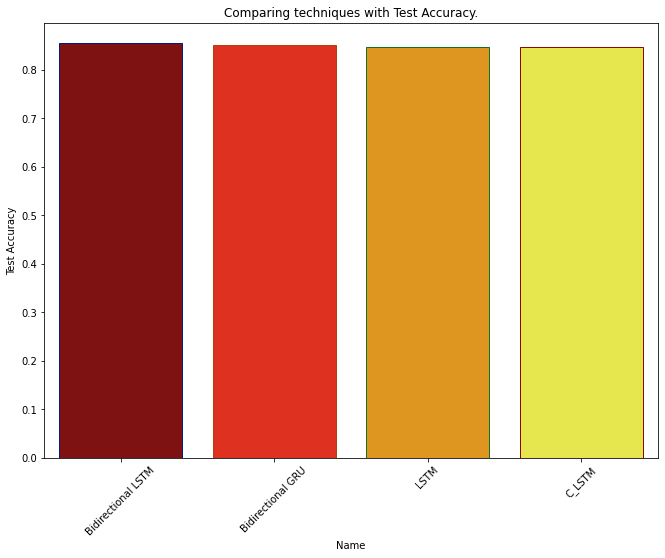

In [ ]:
test_comparison=compare_plots("Test Accuracy","DL comparison","test comparison")

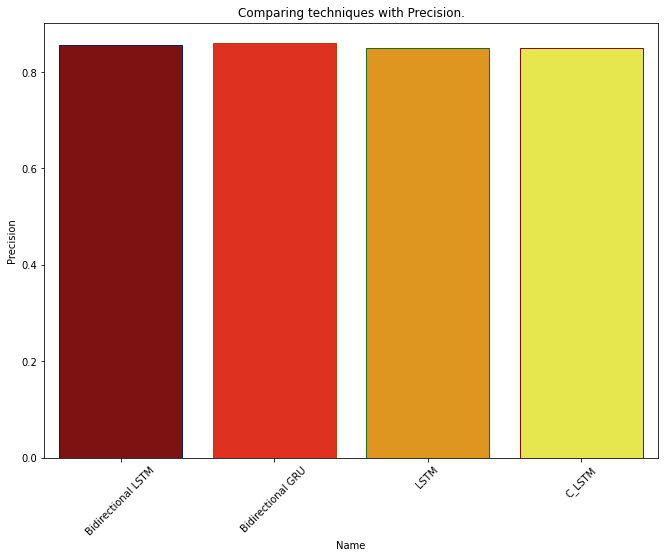

In [ ]:
Precision_comparison=compare_plots("Precision","DL comparison","Precision comparison")

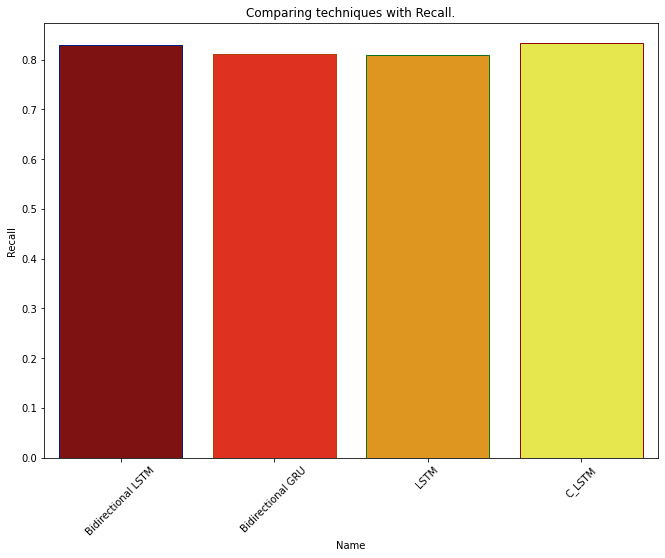

In [ ]:
Recall_comparison=compare_plots("Recall","DL comparison","Recall comparison")

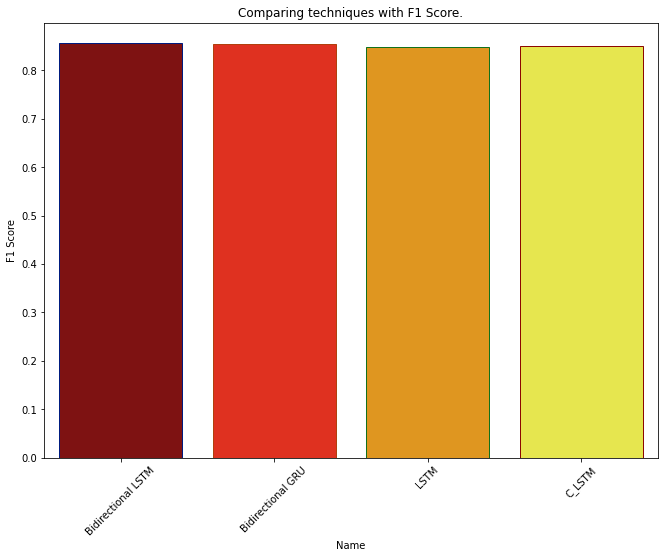

In [ ]:
F1_comparison=compare_plots("F1 Score","DL comparison","F1 Score comparison")